## 1 特征工程是什么？
　　有这么一句话在业界广泛流传：数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已。那特征工程到底是什么呢？顾名思义，其本质是一项工程活动，目的是最大限度地从原始数据中提取特征以供算法和模型使用。通过总结和归纳，人们认为特征工程包括以下方面：
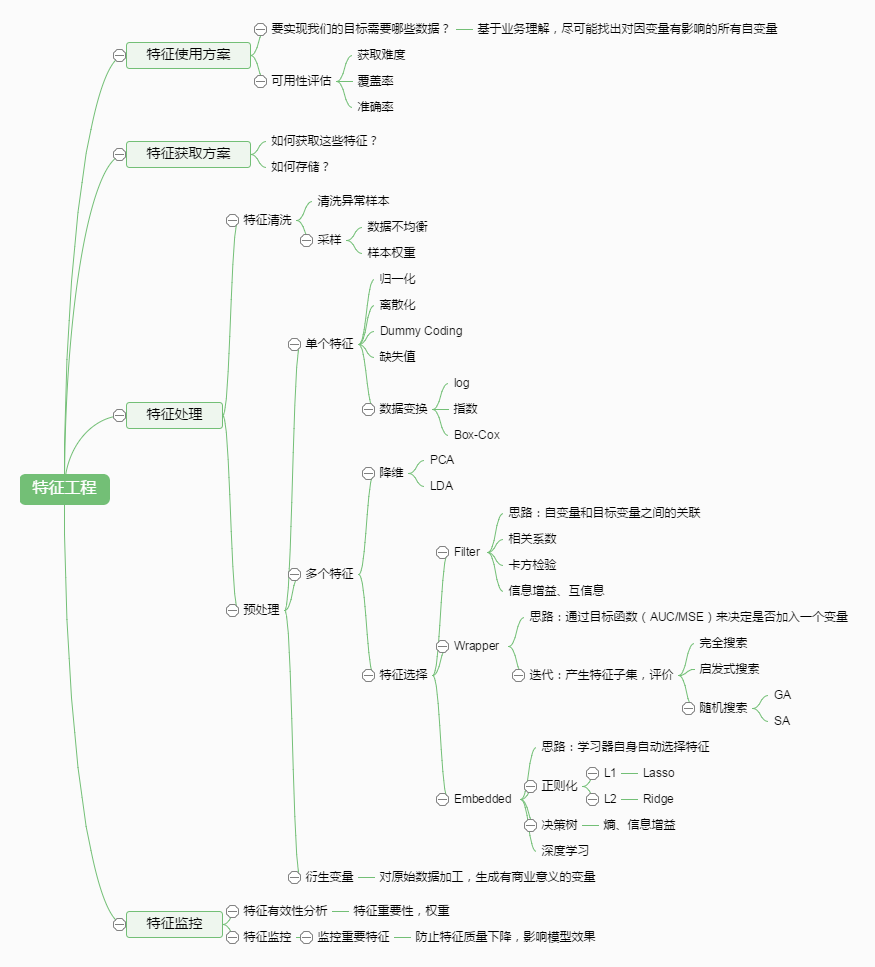

特征处理是特征工程的核心部分，sklearn提供了较为完整的特征处理方法，包括数据预处理，特征选择，降维等。首次接触到sklearn，通常会被其丰富且方便的算法模型库吸引，但是这里介绍的特征处理库也十分强大！

本文中使用sklearn中的IRIS（鸢尾花）数据集来对特征处理功能进行说明。IRIS数据集由Fisher在1936年整理，包含4个特征（Sepal.Length（花萼长度）、Sepal.Width（花萼宽度）、Petal.Length（花瓣长度）、Petal.Width（花瓣宽度）），特征值都为正浮点数，单位为厘米。目标值为鸢尾花的分类（Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），Iris Virginica（维吉尼亚鸢尾））。导入IRIS数据集的代码如下：

In [53]:
from sklearn.datasets import load_iris
#导入IRIS数据集
iris = load_iris()
#特征矩阵
iris.data
#目标向量
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 2 数据预处理
通过特征提取，我们能得到未经处理的特征，这时的特征可能有以下问题：
+ 不属于同一量纲：即特征的规格不一样，不能够放在一起比较。无量纲化可以解决这一问题。
+ 信息冗余：对于某些定量特征，其包含的有效信息为区间划分，例如学习成绩，假若只关心“及格”或不“及格”，那么需要将定量的考分，转换成“1”和“0”表示及格和未及格。二值化可以解决这一问题。
+ 定性特征不能直接使用：某些机器学习算法和模型只能接受定量特征的输入，那么需要将定性特征转换为定量特征。最简单的方式是为每一种定性值指定一个定量值，但是这种方式过于灵活，增加了调参的工作。通常使用【哑编码】的方式将定性特征转换为定量特征：假设有N种定性值，则将这一个特征扩展为N种特征，当原始特征值为第i种定性值时，第i个扩展特征赋值为1，其他扩展特征赋值为0。哑编码的方式相比直接指定的方式，不用增加调参的工作，对于线性模型来说，使用哑编码后的特征可达到非线性的效果。
+ 存在缺失值：缺失值需要补充。
+ 信息利用率低：不同的机器学习算法和模型对数据中信息的利用是不同的，之前提到在线性模型中，使用对定性特征哑编码可以达到非线性的效果。类似地，对定量变量多项式化，或者进行其他的转换，都能达到非线性的效果。
[牛顿插值法](https://www.matongxue.com/madocs/126.html)
我们使用sklearn中的preproccessing库来进行数据预处理，可以覆盖以上问题的解决方案。

### 无量纲化
无量纲化使不同规格的数据转换到同一规格。常见的无量纲化方法有标准化和区间缩放法。标准化的前提是特征值服从正态分布，标准化后，其转换成标准正态分布。区间缩放法利用了边界值信息，将特征的取值区间缩放到某个特点的范围，例如$[0, 1]$等。

#### 标准化
将服从正态分布的特征值转换成标准正态分布（对列向量处理）。标准化需要计算特征的均值和标准差，公式表达为：
$$x'=\frac{x-\overline{X}}{S}$$
使用preproccessing库的StandardScaler类对数据进行标准化的代码如下：

In [54]:
from sklearn.preprocessing import StandardScaler
#标准化，返回值为标准化后的数据
StandardScaler().fit_transform(iris.data)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

#### 区间缩放法
将特征值缩放到[0, 1]区间的数据（对列向量处理）。区间缩放法的思路有多种，常见的一种为利用两个最值进行缩放，公式表达为：
$$x'=\frac{x-Min}{Max-Min}$$
使用preproccessing库的MinMaxScaler类对数据进行区间缩放的代码如下：

In [55]:
from sklearn.preprocessing import MinMaxScaler
#区间缩放，返回值为缩放到[0, 1]区间的数据
MinMaxScaler().fit_transform(iris.data)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

#### 归一化
将行向量转化为“单位向量”（对每个样本处理）。规则为l2的归一化公式如下：
$$x'=\frac{x}{\sqrt{\sum^m_jx{[j]^2}}}$$
使用preproccessing库的Normalizer类对数据进行归一化的代码如下：

In [56]:
from sklearn.preprocessing import Normalizer
#归一化，返回值为归一化后的数据
Normalizer().fit_transform(iris.data)

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

### 对定量特征二值化
定量特征二值化的核心在于设定一个阈值，大于阈值的赋值为1，小于等于阈值的赋值为0。

用preproccessing库的Binarizer类对数据进行二值化的代码如下：

In [57]:
from sklearn.preprocessing import Binarizer
#二值化，阈值设置为3，返回值为二值化后的数据
Binarizer(threshold=3).fit_transform(iris.data)

array([[1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],


### 对定性特征哑编码
由于IRIS数据集的特征皆为定量特征，故使用其目标值进行哑编码（实际上是不需要的）。
使用preproccessing库的OneHotEncoder类对数据进行哑编码的代码如下：

In [58]:
from sklearn.preprocessing import OneHotEncoder
#哑编码，对IRIS数据集的目标值，返回值为哑编码后的数据
OneHotEncoder().fit_transform(iris.target.reshape((-1,1)))

<150x3 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

### 缺失值计算
由于IRIS数据集没有缺失值，故对数据集新增一个样本，4个特征均赋值为NaN，表示数据缺失。使用preproccessing库的Imputer类对数据进行缺失值计算的代码如下：

In [59]:
from numpy import vstack, array, nan
from sklearn.impute import SimpleImputer
#缺失值计算，返回值为计算缺失值后的数据
#参数missing_value为缺失值的表示形式，默认为NaN
#参数strategy为缺失值填充方式，默认为mean（均值）
SimpleImputer().fit_transform(vstack((array([nan, nan, nan, nan]), iris.data)))

array([[5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.1       , 3.5       , 1.4       , 0.2       ],
       [4.9       , 3.        , 1.4       , 0.2       ],
       [4.7       , 3.2       , 1.3       , 0.2       ],
       [4.6       , 3.1       , 1.5       , 0.2       ],
       [5.        , 3.6       , 1.4       , 0.2       ],
       [5.4       , 3.9       , 1.7       , 0.4       ],
       [4.6       , 3.4       , 1.4       , 0.3       ],
       [5.        , 3.4       , 1.5       , 0.2       ],
       [4.4       , 2.9       , 1.4       , 0.2       ],
       [4.9       , 3.1       , 1.5       , 0.1       ],
       [5.4       , 3.7       , 1.5       , 0.2       ],
       [4.8       , 3.4       , 1.6       , 0.2       ],
       [4.8       , 3.        , 1.4       , 0.1       ],
       [4.3       , 3.        , 1.1       , 0.1       ],
       [5.8       , 4.        , 1.2       , 0.2       ],
       [5.7       , 4.4       , 1.5       , 0.4       ],
       [5.4       , 3.9       ,

### 数据变换
常见的数据变换有基于多项式的、基于指数函数的、基于对数函数的。2个特征，度为2的多项式转换公式如下：
$$x_1',x_2',x_3',x_4',x_5',x_6'=1,x_1,x_2,x_1*x_2,x_1^2,x_2^2$$
使用preproccessing库的PolynomialFeatures类对数据进行多项式转换的代码如下：

In [60]:
from sklearn.preprocessing import PolynomialFeatures
#多项式转换
#参数degree为度，默认值为2
PolynomialFeatures().fit_transform(iris.data)

array([[ 1.  ,  5.1 ,  3.5 , ...,  1.96,  0.28,  0.04],
       [ 1.  ,  4.9 ,  3.  , ...,  1.96,  0.28,  0.04],
       [ 1.  ,  4.7 ,  3.2 , ...,  1.69,  0.26,  0.04],
       ...,
       [ 1.  ,  6.5 ,  3.  , ..., 27.04, 10.4 ,  4.  ],
       [ 1.  ,  6.2 ,  3.4 , ..., 29.16, 12.42,  5.29],
       [ 1.  ,  5.9 ,  3.  , ..., 26.01,  9.18,  3.24]])

基于单变元函数的数据变换可以使用一个统一的方式完成，使用preproccessing库的FunctionTransformer对数据进行对数函数转换的代码如下：

In [61]:
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer
#自定义转换函数为对数函数的数据变换
#第一个参数是单变元函数
FunctionTransformer(log1p).fit_transform(iris.data)

array([[1.80828877, 1.5040774 , 0.87546874, 0.18232156],
       [1.77495235, 1.38629436, 0.87546874, 0.18232156],
       [1.74046617, 1.43508453, 0.83290912, 0.18232156],
       [1.7227666 , 1.41098697, 0.91629073, 0.18232156],
       [1.79175947, 1.5260563 , 0.87546874, 0.18232156],
       [1.85629799, 1.58923521, 0.99325177, 0.33647224],
       [1.7227666 , 1.48160454, 0.87546874, 0.26236426],
       [1.79175947, 1.48160454, 0.91629073, 0.18232156],
       [1.68639895, 1.36097655, 0.87546874, 0.18232156],
       [1.77495235, 1.41098697, 0.91629073, 0.09531018],
       [1.85629799, 1.54756251, 0.91629073, 0.18232156],
       [1.75785792, 1.48160454, 0.95551145, 0.18232156],
       [1.75785792, 1.38629436, 0.87546874, 0.09531018],
       [1.66770682, 1.38629436, 0.74193734, 0.09531018],
       [1.91692261, 1.60943791, 0.78845736, 0.18232156],
       [1.90210753, 1.68639895, 0.91629073, 0.33647224],
       [1.85629799, 1.58923521, 0.83290912, 0.33647224],
       [1.80828877, 1.5040774 ,

## 汇总
类|	功能|	说明|
-:|:-|:-
StandardScaler|	无量纲化|	标准化，基于特征矩阵的列，将特征值转换至服从标准正态分布|
MinMaxScaler|	无量纲化|	区间缩放，基于最大最小值，将特征值转换到[0, 1]区间上|
Normalizer|	归一化|	基于特征矩阵的行，将样本向量转换为“单位向量”|
Binarizer|	二值化|	基于给定阈值，将定量特征按阈值划分|
OneHotEncoder|	哑编码|	将定性数据编码为定量数据|
Imputer|	缺失值计算|	计算缺失值，缺失值可填充为均值等|
PolynomialFeatures|	多项式数据转换|	多项式数据转换|
FunctionTransformer|	自定义单元数据转换|	使用单变元的函数来转换数据|
 

## 3 特征选择
当数据预处理完成后，我们需要选择有意义的特征输入机器学习的算法和模型进行训练。通常来说，从两个方面考虑来选择特征：

+ 特征是否发散：如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。
+ 特征与目标的相关性：这点比较显见，与目标相关性高的特征，应当优选选择。除方差法外，本文介绍的其他方法均从相关性考虑。

根据特征选择的形式又可以将特征选择方法分为3种：

+ Filter：过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。
+ Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。
+ Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。

我们使用sklearn中的feature_selection库来进行特征选择。

### 过滤法（Filter）
#### 方差选择法
使用方差选择法，先要计算各个特征的方差，然后根据阈值，选择方差大于阈值的特征。

使用feature_selection库的VarianceThreshold类来选择特征。当然如果我们的特征是连续变量，我们直接设置阈值。对于离散变量，我们应该根据其分布计算其方差。
例如，假设我们有一个特征是布尔值的数据集，我们想要移除那些在整个数据集中特征值为0或者为1的比例超过80%的特征。布尔特征是伯努利（ Bernoulli ）随机变量，变量的方差为：
$$Var[X] = p(1 - p)$$
因此，我们可以使用阈值$.8 * (1 - .8)$进行选择。代码如下:

In [62]:
from sklearn.feature_selection import VarianceThreshold
#方差选择法，返回值为特征选择后的数据
#参数threshold为方差的阈值
VarianceThreshold(threshold=3).fit_transform(iris.data)

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

#### 相关系数法
使用相关系数法，先要计算各个特征对目标值的相关系数以及相关系数的P值。用feature_selection库的SelectKBest类结合相关系数来选择特征的代码如下：

In [63]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
import numpy as np
#选择K个最好的特征，返回选择特征后的数据
#第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。
#参数k为选择的特征个数
def pearsonrCal(X,y):
    result = []
    for i in range(X.shape[1]):
        result.append(pearsonr(X[:,i], y))
    result = np.array(result).T
    F = result[0,:]
    pval = result[1,:]
    return F,pval
SelectKBest(pearsonrCal, k=2).fit_transform(iris.data, iris.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

#### 卡方检验
经典的卡方检验是检验定性自变量对定性因变量的相关性。假设自变量有N种取值，因变量有M种取值，考虑自变量等于i且因变量等于j的样本频数的观察值与期望的差距，构建统计量：
$$X^2=\sum\frac{(A-E)^2}{E}$$
这个统计量的含义简而言之就是自变量对因变量的相关性。用feature_selection库的SelectKBest类结合卡方检验来选择特征的代码如下：

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#选择K个最好的特征，返回选择特征后的数据
SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

#### 互信息法
经典的互信息也是评价定性自变量对定性因变量的相关性的，互信息计算公式如下：
$$I(X;Y)=\sum_{x\in X}\sum_{y\in Y}p(x,y)log\frac{p(x,y)}{p(x)p(y)}$$
为了处理定量数据，最大信息系数法被提出，使用feature_selection库的SelectKBest类结合最大信息系数法来选择特征的代码如下：

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
#选择K个最好的特征，返回特征选择后的数据
SelectKBest(mutual_info_classif, k=2).fit_transform(iris.data, iris.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

### 包装法（Wrapper）
#### 递归特征消除法
递归消除特征法使用一个基模型来进行多轮训练，每轮训练后，消除若干权值系数的特征，再基于新的特征集进行下一轮训练。使用feature_selection库的RFE类来选择特征的代码如下：

In [70]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
#递归特征消除法，返回特征选择后的数据
#参数estimator为基模型
#参数n_features_to_select为选择的特征个数
RFE(estimator=SVC(kernel='linear'), n_features_to_select=2, step=1).fit_transform(iris.data, iris.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

### 嵌入法（Embedded）
#### 基于惩罚项的特征选择法
使用带惩罚项的基模型，除了筛选出特征外，同时也进行了降维。使用feature_selection库的SelectFromModel类结合带L1惩罚项的逻辑回归模型，来选择特征的代码如下：

In [79]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
#带L1惩罚项的逻辑回归作为基模型的特征选择
SelectFromModel(LogisticRegression(penalty="l1", C=0.1,solver='liblinear')).fit_transform(iris.data, iris.target)

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

L1惩罚项降维的原理在于保留多个对目标值具有同等相关性的特征中的一个，所以没选到的特征不代表不重要。故，可结合L2惩罚项来优化。具体操作为：若一个特征在L1中的权值为1，选择在L2中权值差别不大且在L1中权值为0的特征构成同类集合，将这一集合中的特征平分L1中的权值，故需要构建一个新的逻辑回归模型：

In [80]:
from sklearn.linear_model import LogisticRegression

class LR(LogisticRegression):
    def __init__(self, threshold=0.01, dual=False, tol=1e-4, C=1.0,
                 fit_intercept=True, intercept_scaling=1, class_weight=None,
                 random_state=None, solver='liblinear', max_iter=100,
                 multi_class='ovr', verbose=0, warm_start=False, n_jobs=1):

        #权值相近的阈值
        self.threshold = threshold
        LogisticRegression.__init__(self, penalty='l1', dual=dual, tol=tol, C=C,
                 fit_intercept=fit_intercept, intercept_scaling=intercept_scaling, class_weight=class_weight,
                 random_state=random_state, solver=solver, max_iter=max_iter,
                 multi_class=multi_class, verbose=verbose, warm_start=warm_start, n_jobs=n_jobs)
        #使用同样的参数创建L2逻辑回归
        self.l2 = LogisticRegression(penalty='l2', dual=dual, tol=tol, C=C, fit_intercept=fit_intercept, intercept_scaling=intercept_scaling, class_weight = class_weight, random_state=random_state, solver=solver, max_iter=max_iter, multi_class=multi_class, verbose=verbose, warm_start=warm_start, n_jobs=n_jobs)

    def fit(self, X, y, sample_weight=None):
        #训练L1逻辑回归
        super(LR, self).fit(X, y, sample_weight=sample_weight)
        self.coef_old_ = self.coef_.copy()
        #训练L2逻辑回归
        self.l2.fit(X, y, sample_weight=sample_weight)

        cntOfRow, cntOfCol = self.coef_.shape
        #权值系数矩阵的行数对应目标值的种类数目
        for i in range(cntOfRow):
            for j in range(cntOfCol):
                coef = self.coef_[i][j]
                #L1逻辑回归的权值系数不为0
                if coef != 0:
                    idx = [j]
                    #对应在L2逻辑回归中的权值系数
                    coef1 = self.l2.coef_[i][j]
                    for k in range(cntOfCol):
                        coef2 = self.l2.coef_[i][k]
                        #在L2逻辑回归中，权值系数之差小于设定的阈值，且在L1中对应的权值为0
                        if abs(coef1-coef2) < self.threshold and j != k and self.coef_[i][k] == 0:
                            idx.append(k)
                    #计算这一类特征的权值系数均值
                    mean = coef / len(idx)
                    self.coef_[i][idx] = mean
        return self

使用feature_selection库的SelectFromModel类结合带L1以及L2惩罚项的逻辑回归模型，来选择特征的代码如下：

In [81]:
from sklearn.feature_selection import SelectFromModel
#带L1和L2惩罚项的逻辑回归作为基模型的特征选择
#参数threshold为权值系数之差的阈值
SelectFromModel(LR(threshold=0.5, C=0.1)).fit_transform(iris.data, iris.target)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### 基于树模型的特征选择法
树模型中GBDT也可用来作为基模型进行特征选择，使用feature_selection库的SelectFromModel类结合GBDT模型，来选择特征的代码如下：

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
#GBDT作为基模型的特征选择
SelectFromModel(GradientBoostingClassifier()).fit_transform(iris.data, iris.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

### 总结与拓展
类|	特征选择方法|	 说明|
-|-|-
VarianceThreshold|	Filter|	   方差选择法|
SelectKBest|	Filter|	  可选关联系数、卡方校验、最大信息系数作为得分计算的方法
RFE|	Wrapper|	   递归地训练基模型，将权值系数较小的特征从特征集合中消除
SelectFromModel|	Embedded|	  训练基模型，选择权值系数较高的特征

#### 拓展资料
1. [基于Scikit-learn的特征选择](ttps://scikit-learn.org/stable/modules/feature_selection.html)，该部分包含上述方法的描述以及使用的注意事项。


## 4 降维
当特征选择完成后，可以直接训练模型了，但是可能由于特征矩阵过大，导致计算量大，训练时间长的问题，因此降低特征矩阵维度也是必不可少的。常见的降维方法除了以上提到的基于L1惩罚项的模型以外，另外还有主成分分析法（PCA）和线性判别分析（LDA），线性判别分析本身也是一个分类模型。PCA和LDA有很多的相似点，其本质是要将原始的样本映射到维度更低的样本空间中，但是PCA和LDA的映射目标不一样：PCA是为了让映射后的样本具有最大的发散性；而LDA是为了让映射后的样本有最好的分类性能。所以说PCA是一种无监督的降维方法，而LDA是一种有监督的降维方法。

### 主成分分析法（PCA）
使用decomposition库的PCA类选择特征的代码如下：

In [25]:
from sklearn.decomposition import PCA
#主成分分析法，返回降维后的数据
#参数n_components为主成分数目
PCA(n_components=2).fit_transform(iris.data)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

### 线性判别分析法（LDA）
使用lda库的LDA类选择特征的代码如下：

In [26]:
from sklearn.lda import LDA
#线性判别分析法，返回降维后的数据
#参数n_components为降维后的维数
LDA(n_components=2).fit_transform(iris.data, iris.target)

ModuleNotFoundError: No module named 'sklearn.lda'

### 回顾
库|	类|	说明|
-|-|-
decomposition|	PCA|	主成分分析法
lda|	LDA|	线性判别分析法

## 5 总结
再让我们回归一下本文开始的特征工程的思维导图，我们可以使用sklearn完成几乎所有特征处理的工作，而且不管是数据预处理，还是特征选择，抑或降维，它们都是通过某个类的方法fit_transform完成的，fit_transform要不只带一个参数：特征矩阵，要不带两个参数：特征矩阵加目标向量。这些难道都是巧合吗？还是故意设计成这样？方法fit_transform中有fit这一单词，它和训练模型的fit方法有关联吗？接下来，我将在《使用sklearn优雅地进行数据挖掘》中阐述其中的奥妙！

## 6 参考资料
1. [使用sklearn做单机特征工程](https://www.cnblogs.com/jasonfreak/p/5448385.html?utm_source=wechat_session&utm_medium=social&utm_oi=769350066971353088)